In [1]:
import pandas as pd
cloth_df = pd.read_csv('./data/cloth_df.csv')
sun_df = pd.read_csv('./data/sun_df.csv')
tem_df = pd.read_csv('./data/tem_df.csv')
cloth_df = cloth_df.set_index('날짜')
sun_df = sun_df.set_index('날짜')
tem_df = tem_df.set_index('날짜')

tem_m = tem_df.groupby('월').mean()
tem_m


,평균기온,평균최고기온,평균최저기온,일교차,기온등락률,일교차등락률
월,,,,,,
1,-2.492308,1.807692,-6.223077,8.030769,0.797741,0.027525
2,0.446154,5.176923,-3.576923,8.753846,-1.227765,0.093012
3,6.553846,11.838462,2.138462,9.700000,0.129243,0.112483
4,12.538462,18.000000,7.923077,10.076923,0.992965,0.046267
5,18.550000,24.091667,13.766667,10.325000,0.524850,0.030133
6,23.316667,28.433333,19.233333,9.200000,0.259459,-0.103001
7,26.016667,29.816667,23.050000,6.766667,0.116911,-0.261217
8,26.741667,30.625000,23.650000,6.975000,0.029417,0.041015
9,22.016667,26.625000,18.108333,8.516667,-0.175497,0.236668


In [2]:
cloth_m = cloth_df.groupby('월').mean()


In [3]:
sun_m = sun_df.groupby('월').mean()

In [4]:
cs_df_m = pd.merge(cloth_m, sun_m, how = 'left', on = cloth_m.index)
cs_df_m = cs_df_m.rename(columns={'key_0' : '날짜'})
cs_df_m = cs_df_m.set_index('날짜')
cs_df_m
cst_df_m = pd.merge(cs_df_m, tem_m, how = 'left', on = cs_df_m.index)
cst_df_m = cst_df_m.rename(columns={'key_0' : '날짜'})
cst_df_m

,날짜,의류/잡화,소비판매지수,소비자물가지수,일조시간,일조율,일조시간등락,일조율등락,평균기온,평균최고기온,평균최저기온,일교차,기온등락률,일교차등락률
0,1,-14.600000,-0.068581,0.005726,191.561538,62.826923,0.070980,0.049165,-2.492308,1.807692,-6.223077,8.030769,0.797741,0.027525
1,2,-7.584615,-0.068707,0.003762,186.423077,61.233846,-0.023250,-0.022478,0.446154,5.176923,-3.576923,8.753846,-1.227765,0.093012
2,3,18.176923,0.101897,0.000658,221.346154,59.655385,0.194482,-0.019812,6.553846,11.838462,2.138462,9.700000,0.129243,0.112483
3,4,2.907692,-0.017042,0.001152,221.984615,56.160769,0.026303,-0.036594,12.538462,18.000000,7.923077,10.076923,0.992965,0.046267
4,5,11.466667,0.049214,0.001094,245.958333,55.885000,0.127573,0.012609,18.550000,24.091667,13.766667,10.325000,0.524850,0.030133
5,6,-12.083333,-0.035554,-0.000504,220.916667,49.970833,-0.079125,-0.083207,23.316667,28.433333,19.233333,9.200000,0.259459,-0.103001
6,7,-5.725000,0.006224,0.000503,145.058333,32.471667,-0.336104,-0.343199,26.016667,29.816667,23.050000,6.766667,0.116911,-0.261217
7,8,-11.650000,-0.026092,0.004418,166.741667,39.736667,0.188581,0.267698,26.741667,30.625000,23.650000,6.975000,0.029417,0.041015
8,9,14.716667,0.045956,0.003408,196.183333,52.756667,0.319201,0.491662,22.016667,26.625000,18.108333,8.516667,-0.175497,0.236668
9,10,15.983333,0.018003,-0.001047,222.250000,64.164167,0.150600,0.236156,15.233333,20.591667,10.683333,9.908333,-0.308316,0.171367


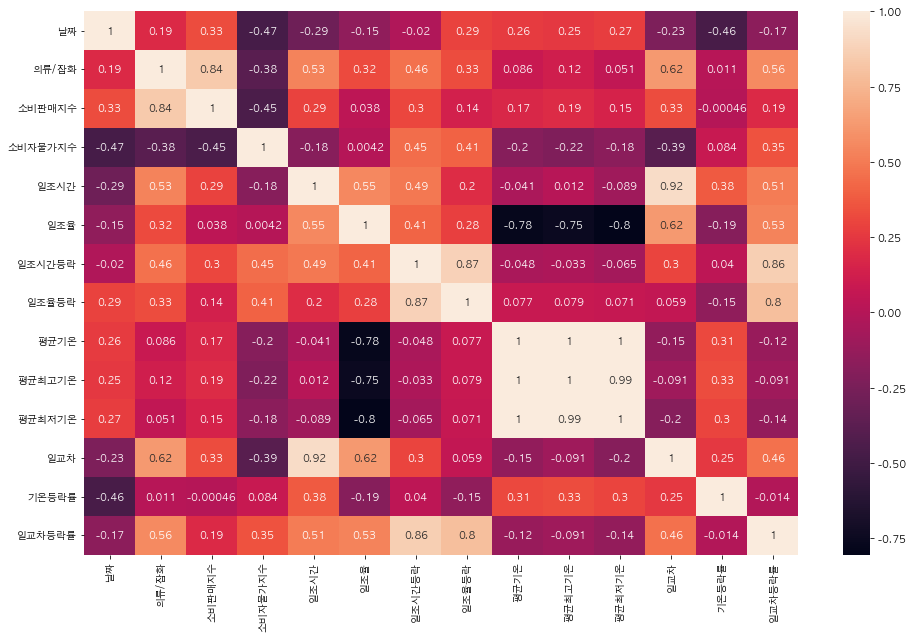

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(16,10))

sns.heatmap(cst_df_m.corr(), annot=True)

plt.show()

In [6]:
cs_df = pd.merge(cloth_df, sun_df, how = 'left', on = cloth_df.index)
cs_df = cs_df.rename(columns={'key_0' : '날짜'})
cs_df = cs_df.set_index('날짜')
cs_df
cst_df = pd.merge(cs_df, tem_df, how = 'left', on = cs_df.index)
cst_df = cst_df.rename(columns={'key_0' : '날짜'})
cst_df = cst_df.drop(['월_x', '월_y'], axis=1)
cst_df  

,날짜,의류/잡화,소비판매지수,소비자물가지수,일조시간,일조율,일조시간등락,일조율등락,평균기온,평균최고기온,평균최저기온,일교차,기온등락률,일교차등락률,월
0,201001,-18.0,-0.095082,0.007900,167.9,54.65,0.149213,0.117358,-4.5,-0.7,-8.1,7.4,3.500000,0.104478,1
1,201002,0.3,-0.016908,0.002015,141.2,46.66,-0.159023,-0.146203,1.4,4.9,-1.7,6.6,-1.311111,-0.108108,2
2,201003,15.8,0.054054,0.002023,133.0,35.87,-0.058074,-0.231247,4.3,8.1,0.5,7.6,2.071429,0.151515,3
3,201004,0.8,-0.018648,0.004026,166.3,42.09,0.250376,0.173404,9.5,14.0,5.6,8.4,1.209302,0.105263,4
4,201005,9.5,0.042755,0.001011,178.5,40.59,0.073361,-0.035638,17.2,22.0,13.0,9.0,0.810526,0.071429,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,202112,-5.1,0.020048,0.001637,185.4,62.07,0.133252,0.158671,0.6,5.1,-3.5,8.6,-0.926829,-0.054945,12
144,202201,-9.7,-0.076258,0.006248,206.9,67.35,0.115965,0.085065,-2.2,2.6,-6.2,8.8,-4.666667,0.023256,1
145,202202,-18.8,-0.081702,0.005827,203.8,67.33,-0.014983,-0.000297,-1.1,3.8,-5.3,9.1,-0.500000,0.034091,2
146,202203,23.5,0.130677,0.007217,173.0,46.64,-0.151129,-0.307292,7.7,12.7,3.2,9.5,-8.000000,0.043956,3


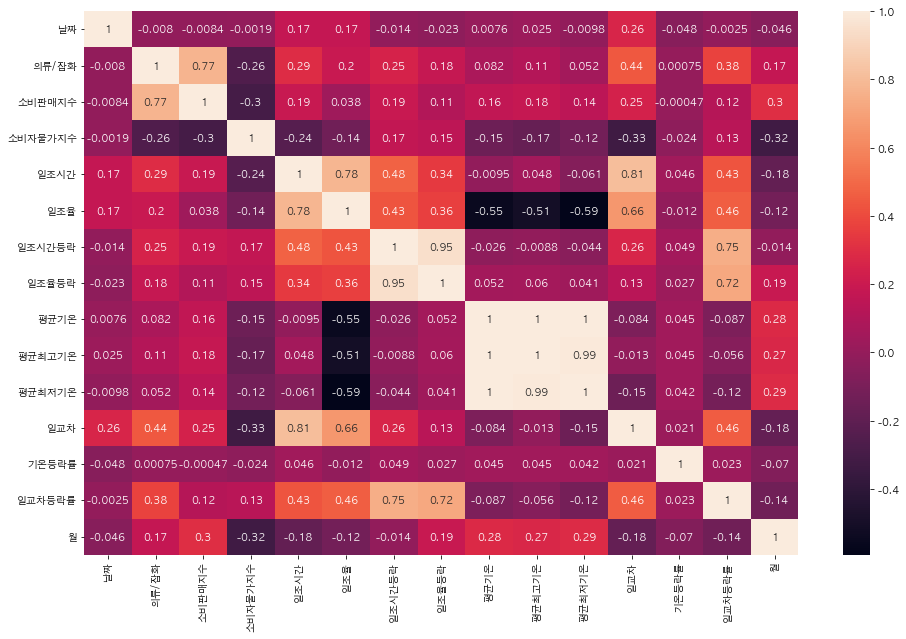

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(16,10))

sns.heatmap(cst_df.corr(), annot=True)

plt.show()

In [8]:
cst_df = cst_df[['날짜', '의류/잡화', '소비판매지수', '일교차', '월']]
cst_m = cst_df.groupby('월').mean()
cst_m = cst_m.reset_index()
cst_m

,월,날짜,의류/잡화,소비판매지수,일교차
0,1,201601.0,-14.600000,-0.068581,8.030769
1,2,201602.0,-7.584615,-0.068707,8.753846
2,3,201603.0,18.176923,0.101897,9.700000
3,4,201604.0,2.907692,-0.017042,10.076923
4,5,201555.0,11.466667,0.049214,10.325000
5,6,201556.0,-12.083333,-0.035554,9.200000
6,7,201557.0,-5.725000,0.006224,6.766667
7,8,201558.0,-11.650000,-0.026092,6.975000
8,9,201559.0,14.716667,0.045956,8.516667
9,10,201560.0,15.983333,0.018003,9.908333


In [9]:
cst_df[["소비"]] = "" 
cst_df

/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_50062/745071152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cst_df[["소비"]] = ""


,날짜,의류/잡화,소비판매지수,일교차,월,소비
0,201001,-18.0,-0.095082,7.4,1,
1,201002,0.3,-0.016908,6.6,2,
2,201003,15.8,0.054054,7.6,3,
3,201004,0.8,-0.018648,8.4,4,
4,201005,9.5,0.042755,9.0,5,
...,...,...,...,...,...,...
143,202112,-5.1,0.020048,8.6,12,
144,202201,-9.7,-0.076258,8.8,1,
145,202202,-18.8,-0.081702,9.1,2,
146,202203,23.5,0.130677,9.5,3,


In [10]:
# 월 평균 등락률    cst_m['의류/잡화'][cst_m['월']==cst_df.loc[i, '월']].values > 0:
# 월 등락   cst_df.loc[i, '의류/잡화']
# 소비      cst_df.loc[i, '소비'] = 0
# 지수 평균 cst_m['소비판매지수'][cst_m['월']==cst_df.loc[i, '월']].values
# 지수 cst_df.loc[i, '소비판매지수']

for i in range(0,len(cst_df) ):
    #1차 노드
    if cst_m['의류/잡화'][cst_m['월']==cst_df.loc[i, '월']].values > 0:
        if cst_df.loc[i, '의류/잡화'] > 0:
            if cst_df.loc[i, '의류/잡화'] > cst_m['의류/잡화'][cst_m['월']==cst_df.loc[i, '월']].values:
                cst_df.loc[i, '소비'] = 1
            elif cst_df.loc[i, '의류/잡화'] < cst_m['의류/잡화'][cst_m['월']==cst_df.loc[i, '월']].values:
                if cst_df.loc[i, '소비판매지수'] > 0:
                    cst_df.loc[i, '소비'] = 1
                elif cst_df.loc[i, '소비판매지수'] < 0:
                    if cst_m['소비판매지수'][cst_m['월']==cst_df.loc[i, '월']].values > 0:
                        cst_df.loc[i, '소비'] = 0
                    elif cst_m['소비판매지수'][cst_m['월']==cst_df.loc[i, '월']].values < 0:
                        if cst_df.loc[i, '소비판매지수'] > cst_m['소비판매지수'][cst_m['월']==cst_df.loc[i, '월']].values:
                            cst_df.loc[i, '소비'] = 1
                        elif cst_df.loc[i, '소비판매지수'] < cst_m['소비판매지수'][cst_m['월']==cst_df.loc[i, '월']].values:
                            cst_df.loc[i, '소비'] = 0
        elif cst_df.loc[i, '의류/잡화'] < 0:
            if cst_m['소비판매지수'][cst_m['월']==cst_df.loc[i, '월']].values > 0:
                if cst_df.loc[i, '소비판매지수'] > 0:
                    if cst_df.loc[i, '소비판매지수'] > cst_m['소비판매지수'][cst_m['월']==cst_df.loc[i, '월']].values:
                        cst_df.loc[i, '소비'] = 1
                    elif cst_df.loc[i, '소비판매지수'] < cst_m['소비판매지수'][cst_m['월']==cst_df.loc[i, '월']].values:
                        cst_df.loc[i, '소비'] = 0
                elif cst_df.loc[i, '소비판매지수'] <= 0:
                    cst_df.loc[i, '소비'] = 0
            elif cst_m['소비판매지수'][cst_m['월']==cst_df.loc[i, '월']].values < 0:
                cst_df.loc[i, '소비'] = 0
    elif cst_m['의류/잡화'][cst_m['월']==cst_df.loc[i, '월']].values < 0:
        if cst_df.loc[i, '의류/잡화'] >= 0:
            if cst_df.loc[i, '소비판매지수'] > 0:
                cst_df.loc[i, '소비'] = 1
            elif cst_df.loc[i, '소비판매지수'] < 0: #이쪽에 월 등락 안들어감;;;
                if cst_m['소비판매지수'][cst_m['월']==cst_df.loc[i, '월']].values > 0:
                    cst_df.loc[i, '소비'] = 0
                elif cst_m['소비판매지수'][cst_m['월']==cst_df.loc[i, '월']].values < 0:
                    if cst_df.loc[i, '소비판매지수'] > cst_m['소비판매지수'][cst_m['월']==cst_df.loc[i, '월']].values:
                        cst_df.loc[i, '소비'] = 1
                    elif cst_df.loc[i, '소비판매지수'] < cst_m['소비판매지수'][cst_m['월']==cst_df.loc[i, '월']].values:
                        cst_df.loc[i, '소비'] = 0
        elif cst_df.loc[i, '의류/잡화'] < 0:
            if  cst_df.loc[i, '의류/잡화'] > cst_m['소비판매지수'][cst_m['월']==cst_df.loc[i, '월']].values:
                if cst_df.loc[i, '소비판매지수'] > 0:
                    if cst_m['소비판매지수'][cst_m['월']==cst_df.loc[i, '월']].values > 0:
                        cst_df.loc[i, '소비'] = 1
                    elif cst_m['소비판매지수'][cst_m['월']==cst_df.loc[i, '월']].values < 0:
                        cst_df.loc[i, '소비'] = 0
                elif cst_df.loc[i, '소비판매지수'] < 0:
                    cst_df.loc[i, '소비'] = 0
            elif cst_df.loc[i, '의류/잡화'] < cst_m['소비판매지수'][cst_m['월']==cst_df.loc[i, '월']].values:
                cst_df.loc[i, '소비'] = 0


In [11]:
cst_df[cst_df['월'] == 12]

,날짜,의류/잡화,소비판매지수,일교차,월,소비
11,201012,-5.6,0.035948,8.2,12,0
23,201112,5.4,0.043803,7.0,12,1
35,201212,-3.1,0.023590,6.9,12,0
47,201312,-0.7,0.012158,7.0,12,0
59,201412,0.0,0.052000,8.2,12,1
71,201512,-0.5,0.025400,8.1,12,0
83,201612,-4.5,0.019248,8.5,12,0
95,201712,-5.9,-0.018261,7.9,12,0
107,201812,-2.1,0.001721,8.8,12,0
119,201912,-2.6,0.009967,7.9,12,0


In [12]:
cst_m

,월,날짜,의류/잡화,소비판매지수,일교차
0,1,201601.0,-14.600000,-0.068581,8.030769
1,2,201602.0,-7.584615,-0.068707,8.753846
2,3,201603.0,18.176923,0.101897,9.700000
3,4,201604.0,2.907692,-0.017042,10.076923
4,5,201555.0,11.466667,0.049214,10.325000
5,6,201556.0,-12.083333,-0.035554,9.200000
6,7,201557.0,-5.725000,0.006224,6.766667
7,8,201558.0,-11.650000,-0.026092,6.975000
8,9,201559.0,14.716667,0.045956,8.516667
9,10,201560.0,15.983333,0.018003,9.908333


In [13]:
cst_df['소비'] = cst_df['소비'].astype(int)
cst_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      148 non-null    int64  
 1   의류/잡화   148 non-null    float64
 2   소비판매지수  148 non-null    float64
 3   일교차     148 non-null    float64
 4   월       148 non-null    int64  
 5   소비      148 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 12.2 KB


/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_50062/3653839777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cst_df['소비'] = cst_df['소비'].astype(int)


In [14]:
data = cst_df[['날짜', '월', '의류/잡화', '소비판매지수', '일교차']]
target = cst_df['소비']

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [17]:
ss.fit(data)

StandardScaler()

In [18]:
data_scaled = ss.transform(data)

In [19]:
params = {'C' : [0, 0.1, 1, 10, 20]}

In [20]:
lr = LogisticRegression()
rg = Ridge()
ls = Lasso()
logisticreg = LogisticRegression()
detreec = DecisionTreeClassifier()
randomforest = RandomForestClassifier()

In [21]:
splitter = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
scores_logistic = cross_validate(lr, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_ridge = cross_validate(rg, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_lasso = cross_validate(ls, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_logisticreg = cross_validate(logisticreg, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_dectree = cross_validate(detreec, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_randomforest = cross_validate(randomforest, data, target, cv=splitter, n_jobs=-1, return_train_score=True)

In [22]:
print('로지스틱 train data score : ',np.mean(scores_logistic['train_score'])) 
print('로지스틱 test data score : ',np.mean(scores_logistic['test_score']))  
print('릿지 train data score : ',np.mean(scores_ridge['train_score'])) 
print('릿지 test data score : ',np.mean(scores_ridge['test_score']))  
print('라쏘 train data score : ', np.mean(scores_lasso['train_score'])) 
print('라쏘 test data score : ', np.mean(scores_lasso['test_score'])) 
print('결정트리(Decision Tree) train data score : ',np.mean(scores_dectree['train_score']))
print('결정트리(Decision Tree) test data score : ',np.mean(scores_dectree['test_score']))
print('랜덤포레스트 train data score : ',np.mean(scores_randomforest['train_score']))
print('랜덤포레스트 test data score : ',np.mean(scores_randomforest['test_score']))

로지스틱 train data score :  0.9405214616662296
로지스틱 test data score :  0.9255555555555555
릿지 train data score :  0.6825712207400484
릿지 test data score :  0.6564000228460756
라쏘 train data score :  0.6451768796332645
라쏘 test data score :  0.6294501264477902
결정트리(Decision Tree) train data score :  1.0
결정트리(Decision Tree) test data score :  0.8991666666666666
랜덤포레스트 train data score :  1.0
랜덤포레스트 test data score :  0.9527777777777776


In [23]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state=9)

In [24]:
df_clf = DecisionTreeClassifier()

In [25]:
df_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
X_pred = df_clf.predict(X_test)

In [27]:
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, X_pred)))

예측 정확도: 0.9333


<function matplotlib.pyplot.show(close=None, block=None)>

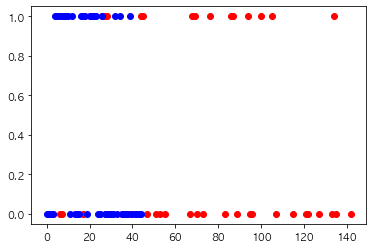

In [28]:
plt.plot(y_test, 'o',c='red')
plt.plot(X_pred, 'o',c='blue')
plt.show

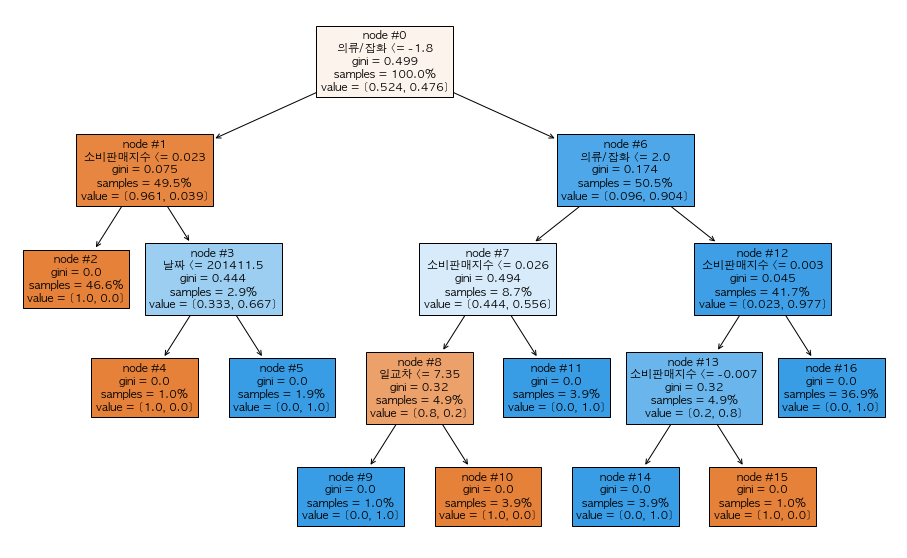

In [29]:
from sklearn.tree import plot_tree
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

feature_names = ['날짜', '월', '의류/잡화', '소비판매지수', '일교차']

plt.figure(figsize=(16,10))
plot_tree(df_clf, filled=True, feature_names=feature_names, node_ids=True, proportion=True)
plt.show()

In [30]:
df_clf.feature_importances_

array([0.02595112, 0.        , 0.80067456, 0.14223297, 0.03114135])

<AxesSubplot:title={'center':'피처중요도'}>

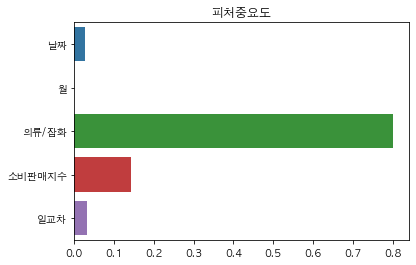

In [31]:
# 피처 중요도 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

plt.title("피처중요도")
sns.barplot(x=df_clf.feature_importances_, y=data.columns)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=61)


In [33]:
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

be_clf = RandomForestClassifier()
be_clf.fit(X_train, y_train)

pred = be_clf.predict(X_test)

print(f'정확도 : {accuracy_score(y_test, pred)}')
print(f'정밀도 TP/(FP+TP) : {precision_score(y_test, pred)}')
print(f'재현율 TP/(FN+TP) : {recall_score(y_test, pred)}')
## precision과 recall은 상충관계에 있었다? trade off관계?

## 왜 실행떄마다 값이 바뀔까

정확도 : 0.9666666666666667
정밀도 TP/(FP+TP) : 0.9
재현율 TP/(FN+TP) : 1.0


In [34]:
from sklearn.metrics import f1_score

print(f'f1 score : {f1_score(y_test, pred)}')


f1 score : 0.9473684210526316


In [35]:
import numpy as np
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

pred_proba = lr_clf.predict_proba(X_test) ## 확률값 리턴 위해
pred = lr_clf.predict(X_test)

#print(pred)
#print(pred_proba) ## 타이타닉 경우의 수 2 생,사
#print(f'shape : {pred_proba.shape}')

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print("두 개의 class중 더 큰 확률을 클래스 값으로 예측 \n", pred_proba_result[:3])


두 개의 class중 더 큰 확률을 클래스 값으로 예측 
 [[0.95744799 0.04255201 0.        ]
 [0.99317735 0.00682265 0.        ]
 [0.98174574 0.01825426 0.        ]]


In [36]:
from sklearn.metrics import precision_recall_curve
#레이블 값이 1일때의 예측 확률
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

#실제 데이터 셋과 레이블 값이 1일때 예측확률을 커브 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print("반환 분류 결정 임계값 배열의 Shape : ", thresholds.shape)
print("반환된 precisions 배열의 shape : ", precisions.shape)
print("q반환된 recalls 배열의 shape : ", recalls.shape)

print("thresholds 5sample : ", thresholds[:5])
print("precisions 5sample : ", precisions[:5])
print("recalls 5sample : ", recalls[:5])

#반환된 임계값 배열 로우가 147건이니까 샘플로 10건, 임계값을 15step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print("샘플 추출 위한 임계값 배열의 index 10개 : ", thr_index)
print("샘플용 10개의 임계값 : ", np.round(thresholds[thr_index], 2))

#15step 단위로 추출된 이계값에 따른 정밀도와 재현율 값
print("샘플 임계값별 정밀도 : ", np.round(precisions[thr_index], 3))
print("샘플 임계값별 재현율 : ", np.round(recalls[thr_index], 3))



반환 분류 결정 임계값 배열의 Shape :  (30,)
반환된 precisions 배열의 shape :  (31,)
q반환된 recalls 배열의 shape :  (31,)
thresholds 5sample :  [2.93238186e-06 4.03919023e-06 1.63224425e-05 1.93270106e-04
 2.47660380e-04]
precisions 5sample :  [0.3        0.31034483 0.32142857 0.33333333 0.34615385]
recalls 5sample :  [1. 1. 1. 1. 1.]
샘플 추출 위한 임계값 배열의 index 10개 :  [ 0 15]
샘플용 10개의 임계값 :  [0.   0.04]
샘플 임계값별 정밀도 :  [0.3 0.6]
샘플 임계값별 재현율 :  [1. 1.]


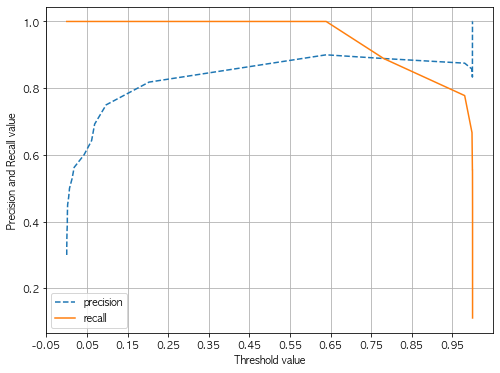

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #x축을 threshold값으로 y축은 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    #threshold 값 x축의 scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    #x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

    
    
    

In [38]:
#XGBoosting 따로 install해야
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=13)


In [39]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Extreme Gradient Boosting (xgboost) 모델 사용

# 1. 모델 선언
xgb  = XGBClassifier()

# 2. 모델 훈련 fit()함수
xgb.fit(X_train, y_train)

# 3. 모델 예측 predict()함수
y_pred = xgb.predict(X_test)

# 4. score()
#xgb.score(X_train, y_train)
acc = accuracy_score(y_pred, y_test)
print(acc)

## 병렬처리 연산이라 속도가 빠름

0.9666666666666667


In [40]:
cst_train = cst_df[0:-13]
cst_test = cst_df[-13:-1]
cst_train

,날짜,의류/잡화,소비판매지수,일교차,월,소비
0,201001,-18.0,-0.095082,7.4,1,0
1,201002,0.3,-0.016908,6.6,2,1
2,201003,15.8,0.054054,7.6,3,1
3,201004,0.8,-0.018648,8.4,4,0
4,201005,9.5,0.042755,9.0,5,1
...,...,...,...,...,...,...
130,202011,-4.1,0.027634,8.6,11,1
131,202012,-13.6,0.000840,8.1,12,0
132,202101,-10.2,-0.057935,9.0,1,0
133,202102,-0.1,-0.053476,10.1,2,0


In [41]:
cst_x_train = cst_train[['날짜', '의류/잡화', '소비판매지수', '일교차', '월',]]
cst_y_train = cst_train['소비']
cst_x_test = cst_test[['날짜', '의류/잡화', '소비판매지수', '일교차', '월',]]
cst_y_test = cst_test['소비']


In [42]:
X_train = cst_x_train
X_test = cst_x_test
y_train = cst_y_train
y_test = cst_y_test


In [43]:
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

be_clf = RandomForestClassifier()
be_clf.fit(X_train, y_train)

pred = be_clf.predict(X_test)

print(f'정확도 : {accuracy_score(y_test, pred)}')

정확도 : 1.0


In [44]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Extreme Gradient Boosting (xgboost) 모델 사용

# 1. 모델 선언
xgb  = XGBClassifier()

# 2. 모델 훈련 fit()함수
xgb.fit(X_train, y_train)

# 3. 모델 예측 predict()함수
y_pred = xgb.predict(X_test)

# 4. score()
#xgb.score(X_train, y_train)
acc = accuracy_score(y_pred, y_test)
print(acc)

## 병렬처리 연산이라 속도가 빠름

1.0


In [45]:
df_clf = DecisionTreeClassifier(random_state=11)
df_clf.fit(X_train, y_train)
X_pred = df_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, X_pred)))

예측 정확도: 1.0000


In [48]:
cst_df.to_csv('./data/cloth.csv', index=0)